In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

In [13]:
file_path = r'C:/Users/techin/Oil_price_Analysis/data/BrentOilPrices.xlsx'
df = pd.read_excel(file_path)

In [14]:
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

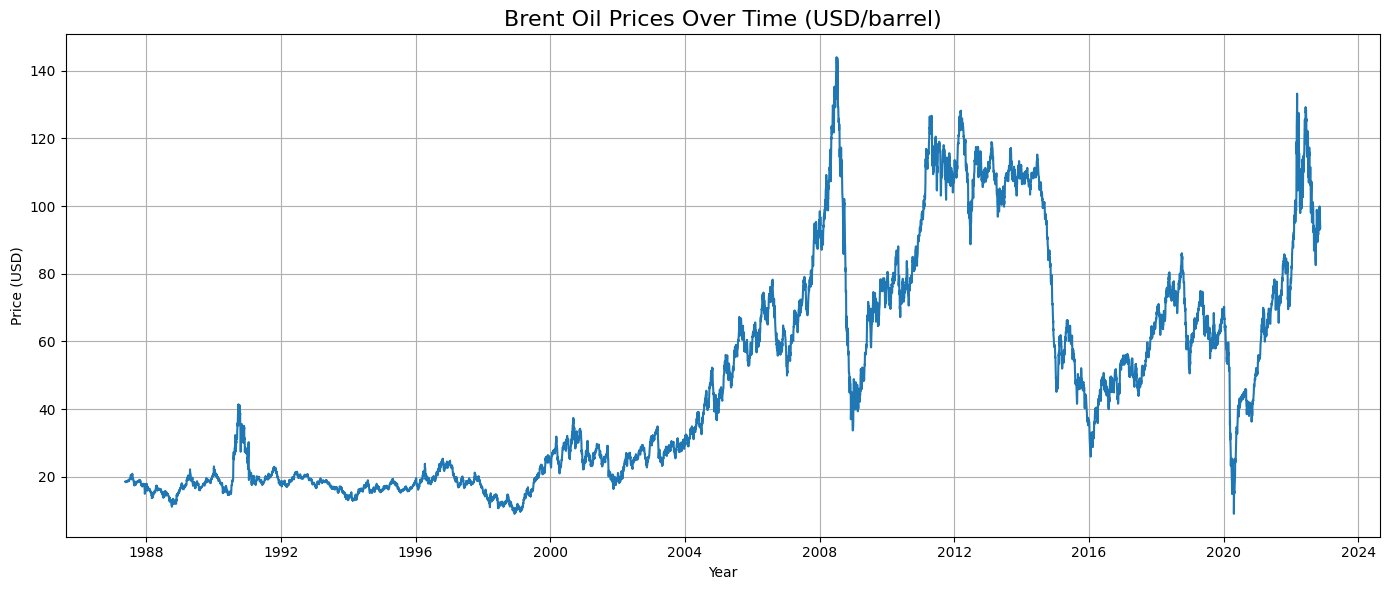

In [16]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='Price')
plt.title('Brent Oil Prices Over Time (USD/barrel)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.savefig("trend_plot.png")
plt.show()

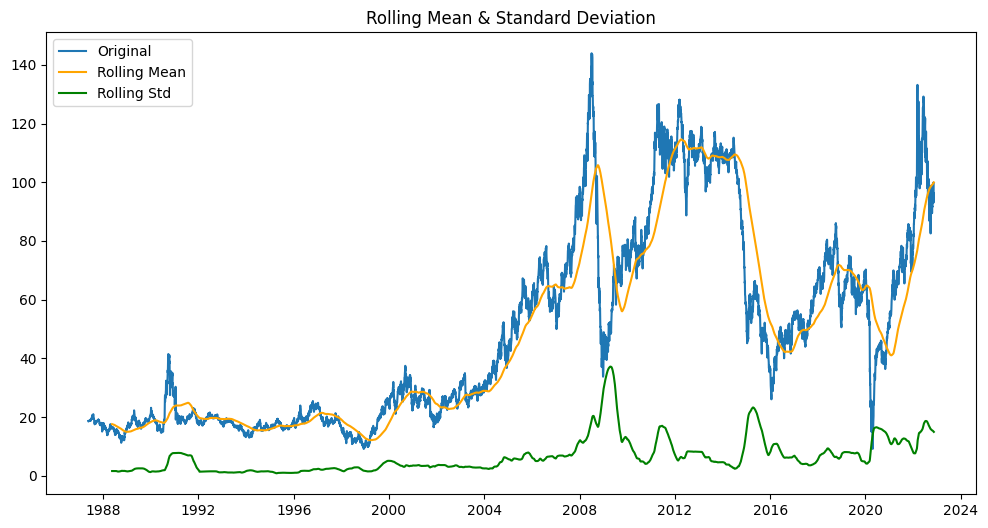

ADF Statistic: -1.9510829133731489
p-value: 0.3084244807833005
Critical Values: {'1%': np.float64(-3.4308561991797255), '5%': np.float64(-2.8617637154959716), '10%': np.float64(-2.566889078817277)}


In [17]:
df = df.asfreq('D').interpolate()  # daily frequency, interpolate missing

# Plot Rolling Statistics
rolling_mean = df['Price'].rolling(window=365).mean()
rolling_std = df['Price'].rolling(window=365).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

# Augmented Dickey-Fuller Test
adf_result = adfuller(df['Price'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])